## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras import regularizers
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0826 00:51:39.071102  7728 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 00:51:39.132976  7728 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 00:51:39.258682  7728 deprecation.py:323] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 6.0103 - acc: 0.2668 - val_loss: 5.8082 - val_acc: 0.3442
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.7200 - acc: 0.3635 - val_loss: 5.6445 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.5745 - acc: 0.3943 - val_loss: 5.5230 - val_acc: 0.3985
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.4575 - acc: 0.4121 - val_loss: 5.4054 - val_acc: 0.4177
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.3474 - acc: 0.4309 - val_loss: 5.3021 - val_acc: 0.4319
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.2482 - acc: 0.4432 - val_loss: 5.2063 - val_acc: 0.4421
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.1512 - acc: 0.4542 - val_loss: 5.1236 - val_acc

50000/50000 [==============================] - 3s 55us/step - loss: 1.8053 - acc: 0.3688 - val_loss: 1.7540 - val_acc: 0.3881
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7176 - acc: 0.3985 - val_loss: 1.6865 - val_acc: 0.4075
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6584 - acc: 0.4199 - val_loss: 1.6368 - val_acc: 0.4316
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.6091 - acc: 0.4378 - val_loss: 1.6071 - val_acc: 0.4344
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.5720 - acc: 0.4484 - val_loss: 1.5803 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5391 - acc: 0.4630 - val_loss: 1.5444 - val_acc: 0.4596
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5088 - acc: 0.4731 - val_loss: 1.5127 - val_acc: 0.4723
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 54us/step - loss: 1.7272 - acc: 0.3958 - val_loss: 1.6911 - val_acc: 0.4112
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6644 - acc: 0.4180 - val_loss: 1.6345 - val_acc: 0.4307
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6140 - acc: 0.4329 - val_loss: 1.5991 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5738 - acc: 0.4479 - val_loss: 1.5625 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5402 - acc: 0.4613 - val_loss: 1.5335 - val_acc: 0.4591
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5074 - acc: 0.4711 - val_loss: 1.5255 - val_acc: 0.4604
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4809 - acc: 0.4809 - val_loss: 1.5028 - val_acc: 0.4668
Epoch 10/50
50000/50000 [===========================

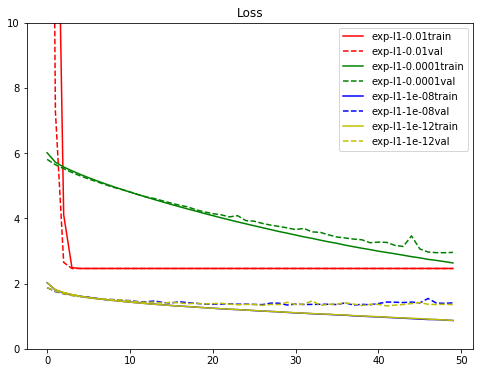

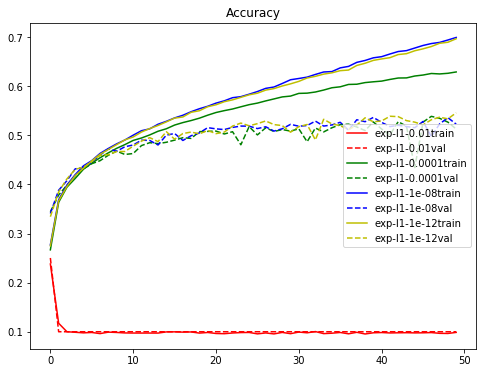

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond+'val', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 10])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond+'val', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()